# Assess end-use interactions in GEB potential study modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys, calendar
sys.path.append('..')
from loadshapes.aggregation import compute_average_loadshapes
from loadshapes.utils import dates
from IPython.display import display
import ipywidgets
%matplotlib inline

In [2]:
dir = 'G:\\Shared drives\\BTO Topic 2  Integrating EE & DR\\Task 2\\Load_Shape_Data\\GEB Potential Study\\GEB Res measure loadshapes'

In [3]:
upgrade='06'
baseline = pd.read_csv(os.path.join(dir,'geb_combind_test10_baseline.csv'))
upgrade = pd.read_csv(os.path.join(dir,'geb_combind_test10_upgrade{u}.csv'.format(u=upgrade)))
baseline#.head()

epw                 time  \
0               USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 01:00:00   
1               USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 02:00:00   
2               USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 03:00:00   
3               USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 04:00:00   
4               USA_AZ_Tucson.Intl.AP.722740_TMY3.epw  2006-01-01 05:00:00   
...                                               ...                  ...   
122635  USA_WA_Seattle-Tacoma.Intl.AP.727930_TMY3.epw  2006-12-31 20:00:00   
122636  USA_WA_Seattle-Tacoma.Intl.AP.727930_TMY3.epw  2006-12-31 21:00:00   
122637  USA_WA_Seattle-Tacoma.Intl.AP.727930_TMY3.epw  2006-12-31 22:00:00   
122638  USA_WA_Seattle-Tacoma.Intl.AP.727930_TMY3.epw  2006-12-31 23:00:00   
122639  USA_WA_Seattle-Tacoma.Intl.AP.727930_TMY3.epw  2007-01-01 00:00:00   

        avg_total_site_electricity_kwh  avg_net_site_electricity_kwh  \
0                             1.085693                      1.085693   
1                             1.135290                      1.135290   
2                             1.192198                      1.192198   
3                             1.248865                      1.248865   
4                             1.338853                      1.338853   
...                                ...                           ...   
122635                        2.230332                      2.230332   
122636                        2.151710                      2.151710   
122637                        2.023708                      2.023708   
122638                        1.936839                      1.936839   
122639                        1.668646                      1.668646   

        avg_electricity_heating_kwh  \
0                          0.426368   
1                          0.529020   
2                          0.611337   
3                          0.671122   
4                          0.753835   
...                             ...   
122635                     0.519468   
122636                     0.524843   
122637                     0.532804   
122638                     0.571703   
122639                     0.630069   

        avg_electricity_central_system_heating_kwh  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
122635                                         0.0   
122636                                         0.0   
122637                                         0.0   
122638                                         0.0   
122639                                         0.0   

        avg_electricity_cooling_kwh  \
0                          0.000037   
1                          0.000000   
2                          0.000000   
3                          0.000000   
4                          0.000006   
...                             ...   
122635                     0.001708   
122636                     0.001721   
122637                     0.001757   
122638                     0.001336   
122639                     0.001228   

        avg_electricity_central_system_cooling_kwh  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
122635                                         0.0   
122636                                         0.0   
122637                                         0.0   
122638                                         0.0   
122639                                         0.0   

        avg_

In [4]:
caldat = dates.create_cal_data(timestamps=pd.to_datetime(baseline['time']).values-pd.Timedelta('1 hours'))

In [5]:
caldat#['timestamp']-pd.Timedelta('1 hours')

timestamp  dow  dom  doy  week  month  dhour  quarter  \
0      2006-01-01 00:00:00    6    1    1    52      1      0        1   
1      2006-01-01 01:00:00    6    1    1    52      1      1        1   
2      2006-01-01 02:00:00    6    1    1    52      1      2        1   
3      2006-01-01 03:00:00    6    1    1    52      1      3        1   
4      2006-01-01 04:00:00    6    1    1    52      1      4        1   
...                    ...  ...  ...  ...   ...    ...    ...      ...   
122635 2006-12-31 19:00:00    6   31  365    52     12     19        4   
122636 2006-12-31 20:00:00    6   31  365    52     12     20        4   
122637 2006-12-31 21:00:00    6   31  365    52     12     21        4   
122638 2006-12-31 22:00:00    6   31  365    52     12     22        4   
122639 2006-12-31 23:00:00    6   31  365    52     12     23        4   

        season  weekend  yhour  
0            1        1      0  
1            1        1      1  
2            1        1      2  
3            1        1      3  
4            1        1      4  
...        ...      ...    ...  
122635       1        1   8755  
122636       1        1   8756  
122637       1        1   8757  
122638       1        1   8758  
122639       1        1   8759  

[122640 rows x 11 columns]

In [6]:
baseline = caldat.join(baseline)
upgrade = caldat.join(upgrade)

In [7]:
upgrade.columns

Index(['timestamp', 'dow', 'dom', 'doy', 'week', 'month', 'dhour', 'quarter',
       'season', 'weekend', 'yhour', 'epw', 'time',
       'avg_total_site_electricity_kwh', 'avg_net_site_electricity_kwh',
       'avg_electricity_heating_kwh',
       'avg_electricity_central_system_heating_kwh',
       'avg_electricity_cooling_kwh',
       'avg_electricity_central_system_cooling_kwh',
       'avg_electricity_interior_lighting_kwh',
       'avg_electricity_exterior_lighting_kwh',
       'avg_electricity_interior_equipment_kwh',
       'avg_electricity_fans_heating_kwh', 'avg_electricity_fans_cooling_kwh',
       'avg_electricity_pumps_heating_kwh',
       'avg_electricity_central_system_pumps_heating_kwh',
       'avg_electricity_pumps_cooling_kwh',
       'avg_electricity_central_system_pumps_cooling_kwh',
       'avg_electricity_water_systems_kwh', 'avg_electricity_pv_kwh',
       'avg_electricity_refrigerator_kwh',
       'avg_electricity_clothes_washer_kwh',
       'avg_electricity_clo

In [8]:
eu_cols = baseline.columns[pd.Series(baseline.columns).str.contains('avg_electricity') & 
                           ~pd.Series(baseline.columns).str.contains('interior_equipment')]
baseline['avg_electricity_total'] = baseline[eu_cols].sum(axis=1)
upgrade['avg_electricity_total'] = upgrade[eu_cols].sum(axis=1)
#baseline

In [9]:
ws_list = baseline['epw'].unique()
ws_sel = ipywidgets.Dropdown(options = ws_list, description='City')
display(ws_sel)
eu_sel = ipywidgets.Dropdown(options = eu_cols, description='End Use')
display(eu_sel)

Dropdown(description='City', options=('USA_AZ_Tucson.Intl.AP.722740_TMY3.epw', 'USA_CA_San.Diego-Lindbergh.Fie…

Dropdown(description='End Use', options=('avg_electricity_heating_kwh', 'avg_electricity_central_system_heatin…

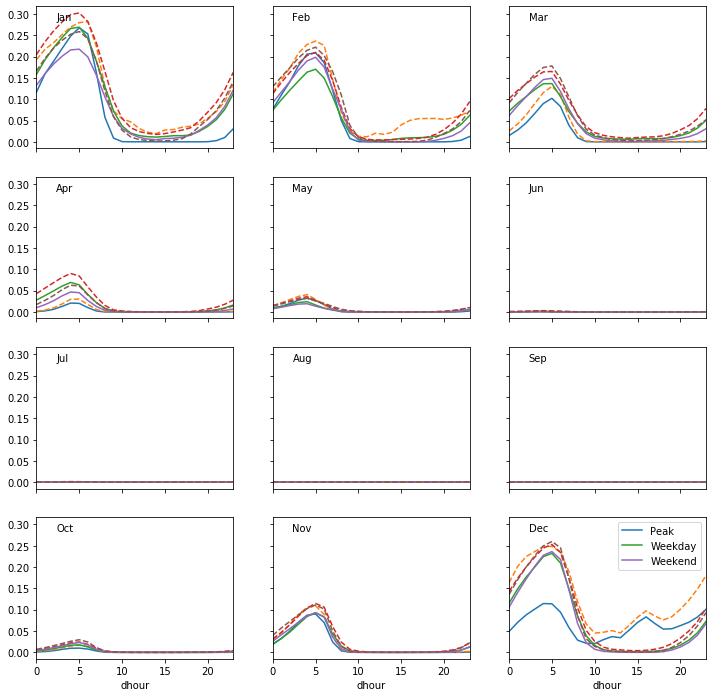

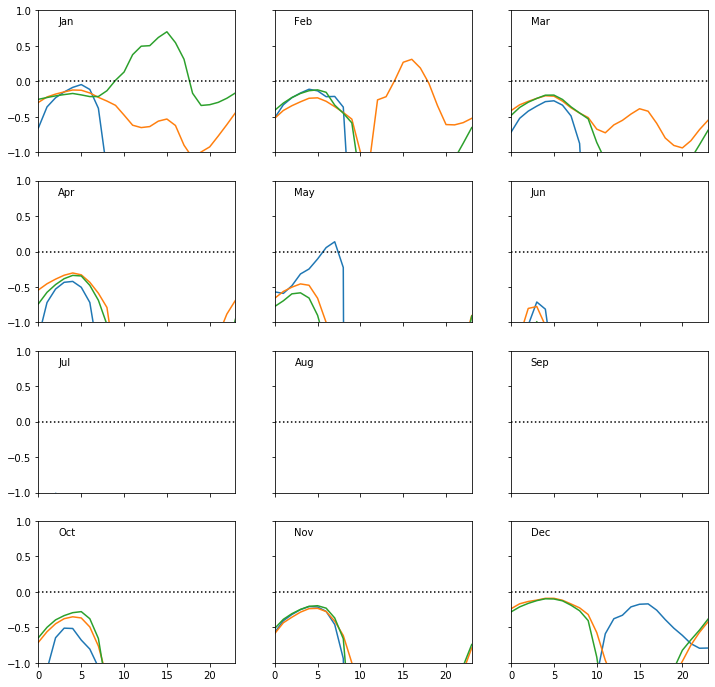

In [11]:
ws = ws_sel.value
base_ws = baseline.loc[baseline['epw']==ws].reset_index(drop=True)
upgr_ws = upgrade.loc[baseline['epw']==ws].reset_index(drop=True)
base_ws = dates.generate_day_types(base_ws, loadcol='avg_electricity_total', npeaks=3)
upgr_ws = dates.generate_day_types(upgr_ws, loadcol='avg_electricity_total', npeaks=3)
base_ws_avg = compute_average_loadshapes(base_ws, by=['month', 'Day Type'], cols=eu_cols)
upgr_ws_avg = compute_average_loadshapes(upgr_ws, by=['month', 'Day Type'], cols=eu_cols)

end_use = eu_sel.value

day_types=['Peak','Weekday', 'Weekend']

fig,axs=plt.subplots(4,3, figsize=[12,12], sharex=True, sharey=True)
fig2,axs2=plt.subplots(4,3, figsize=[12,12], sharex=True, sharey=True)
for i,m in enumerate(base_ws_avg['month'].unique()):
    #print(i, i//3, i%4)
    ax=axs[i//3, i%3]
    ax2=axs2[i//3,i%3]
    for dt in base_ws_avg['Day Type'].unique():
        base_md = base_ws_avg.loc[(base_ws_avg['month']==m) & 
                                  (base_ws_avg['Day Type']==dt)]
        upgr_md = upgr_ws_avg.loc[(upgr_ws_avg['month']==m) &
                        (upgr_ws_avg['Day Type']==dt)]
        base_md.plot(x='dhour', y=end_use, ax=ax, legend=False, label=day_types[dt-1])
        upgr_md.plot(x='dhour', y=end_use, ax=ax, legend=False, label='', linestyle='dashed')
        
        (1-upgr_md[end_use].div(base_md[end_use])).reset_index(
                drop=True).plot(ax=ax2, legend=False, label=day_types[dt-1])
    
    ax2.plot([0,23], [0,0], 'k:')
    ax2.set_ylim([-1,1])
    ax.text(0.1,0.9, calendar.month_abbr[m], transform=ax.transAxes)
    ax2.text(0.1,0.9, calendar.month_abbr[m], transform=ax2.transAxes)
axs[i%4,i//4].legend()

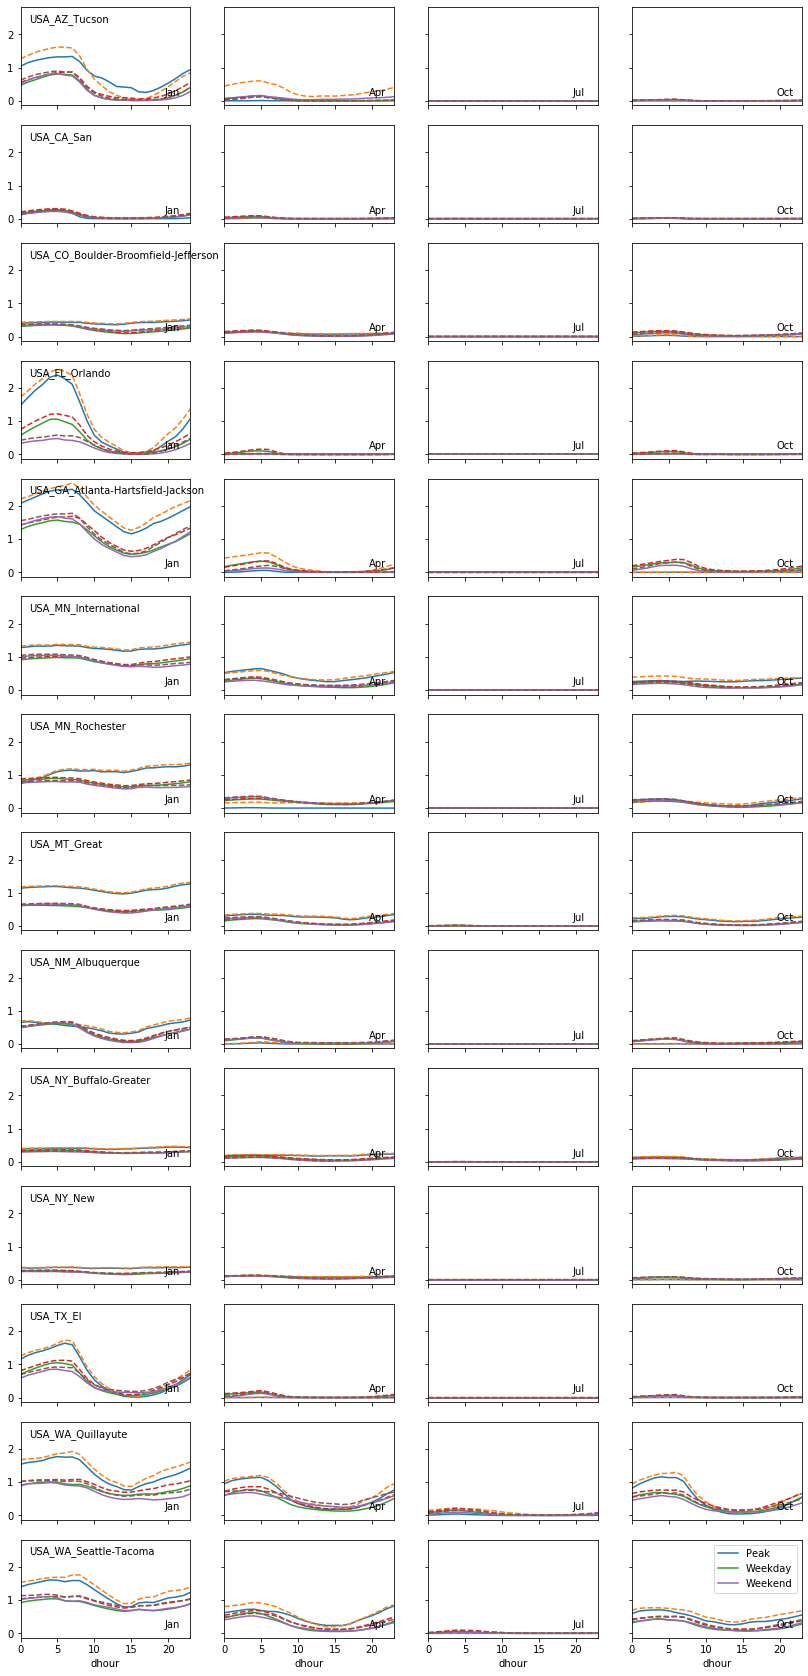

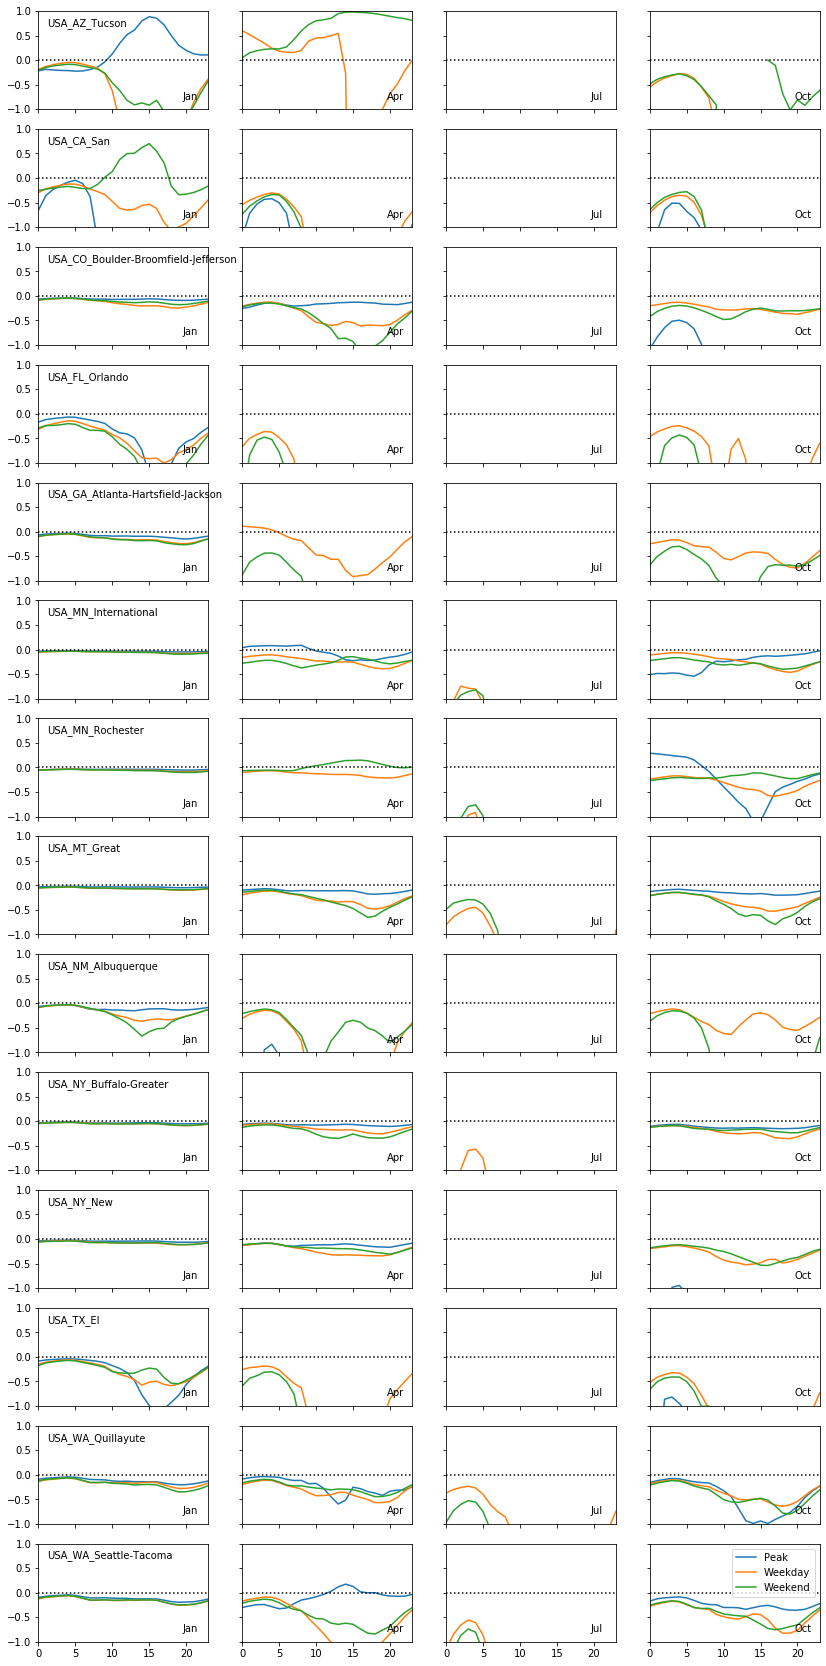

In [12]:
nws = len(ws_list)
fig,axs=plt.subplots(nws,4, figsize=[14,30], sharex=True, sharey=True)
fig2,axs2=plt.subplots(nws,4, figsize=[14,30], sharex=True, sharey=True)


for i,ws in enumerate(ws_list):
    base_ws = baseline.loc[baseline['epw']==ws].reset_index(drop=True)
    upgr_ws = upgrade.loc[baseline['epw']==ws].reset_index(drop=True)
    base_ws = dates.generate_day_types(base_ws, loadcol='avg_electricity_total', npeaks=3)
    upgr_ws = dates.generate_day_types(upgr_ws, loadcol='avg_electricity_total', npeaks=3)
    base_ws_avg = compute_average_loadshapes(base_ws, by=['month', 'Day Type'], cols=eu_cols)
    upgr_ws_avg = compute_average_loadshapes(upgr_ws, by=['month', 'Day Type'], cols=eu_cols)
    
    for j,m in enumerate([1,4,7,10]):
        ax=axs[i,j]
        ax2 = axs2[i,j]
        for dt in base_ws_avg['Day Type'].unique():
            base_md = base_ws_avg.loc[(base_ws_avg['month']==m) & 
                            (base_ws_avg['Day Type']==dt)]
            upgr_md = upgr_ws_avg.loc[(upgr_ws_avg['month']==m) &
                            (upgr_ws_avg['Day Type']==dt)]
            base_md.plot(x='dhour', y=end_use, 
                         ax=ax, legend=False, label=day_types[dt-1])
            upgr_md.plot(x='dhour', y=end_use, 
                         ax=ax, legend=False, label='', linestyle='dashed')
            
            (1-upgr_md[end_use].div(base_md[end_use])).reset_index(
                drop=True).plot(ax=ax2, legend=False, label=day_types[dt-1])

        ax2.set_ylim([-1,1])
        ax2.plot([0,23], [0,0], 'k:')
            
        ax.text(0.85,0.1, calendar.month_abbr[m], transform=ax.transAxes)
        ax2.text(0.85,0.1, calendar.month_abbr[m], transform=ax2.transAxes)
        if m==1:
            ax.text(0.05, 0.85, ws.split('.')[0], transform=ax.transAxes)
            ax2.text(0.05, 0.85, ws.split('.')[0], transform=ax2.transAxes)
            
        

ax.legend()
ax2.legend()
    

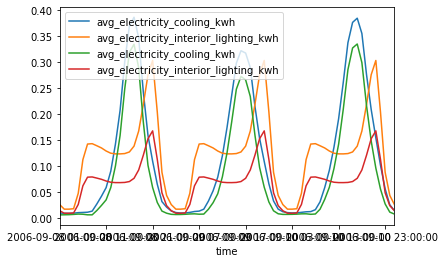

In [17]:
start = 250
end = start+3
ax = base_ws.loc[start*24:end*24].plot(x='time', y=['avg_electricity_cooling_kwh', 'avg_electricity_interior_lighting_kwh'])
upgr_ws.loc[start*24:end*24].plot(x='time', y=['avg_electricity_cooling_kwh', 'avg_electricity_interior_lighting_kwh'], ax=ax)

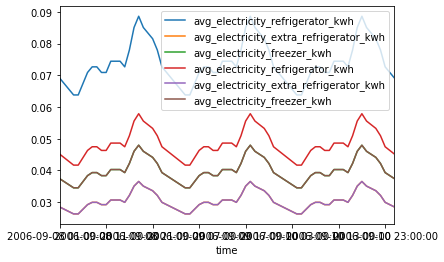

In [18]:
ax = base_ws.loc[start*24:end*24].plot(x='time', y=['avg_electricity_refrigerator_kwh', 
                                                    'avg_electricity_extra_refrigerator_kwh',
                                                    'avg_electricity_freezer_kwh'])
upgr_ws.loc[start*24:end*24].plot(x='time', y=['avg_electricity_refrigerator_kwh',
                                                    'avg_electricity_extra_refrigerator_kwh',
                                               'avg_electricity_freezer_kwh'], ax=ax)

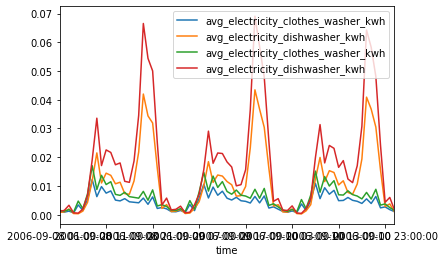

In [19]:
ax = base_ws.loc[start*24:end*24].plot(x='time', y=['avg_electricity_clothes_washer_kwh', 'avg_electricity_dishwasher_kwh'])
upgr_ws.loc[start*24:end*24].plot(x='time', y=['avg_electricity_clothes_washer_kwh', 'avg_electricity_dishwasher_kwh'], ax=ax)